# Autoencoder: How to Use

This notebook goes through the minimal steps required to load and use the autoencoder trained in 'autoencoder-training-and-development.ipynb'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from autoencoder_class import *

# Loading the data as a torch tensor

In [3]:
data = pd.read_csv('sonar.all-data', header=None)
features = data.iloc[:, :-1]

# The data must be float32, or application of the model will give rise to an error.
feature_tensor = torch.tensor(features.values, dtype=torch.float32)

# Loading the trained model

In [4]:
model = AE()
model.load_state_dict(torch.load('trained-autoencoder.pth'))
model.eval()

AE(
  (encoder): Sequential(
    (0): Linear(in_features=60, out_features=52, bias=True)
    (1): ReLU()
    (2): Linear(in_features=52, out_features=44, bias=True)
    (3): ReLU()
    (4): Linear(in_features=44, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=24, bias=True)
    (7): ReLU()
    (8): Linear(in_features=24, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=5, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=44, bias=True)
    (7): ReLU()
    (8): Linear(in_features=44, out_features=52, bias=True)
    (9): ReLU()
    (10): Linear(in_features=52, out_features=60, bias=True)
    (11): Sigmoid()
  )
)

# Calling the encoder

The architecture of the model's forward pass makes it easy to call the encoder and decoder independently of each other. The first data point can be compressed as follows:

In [7]:
compression = model.encoder(feature_tensor[0])
compression

tensor([2.7884, 2.1035, 0.4264, 0.5819, 2.3961], grad_fn=<AddBackward0>)

The autoencoder reconstruction is then given by

In [8]:
model.decoder(compression)

tensor([0.0200, 0.0400, 0.0551, 0.0413, 0.0593, 0.0820, 0.0891, 0.0962, 0.0942,
        0.1039, 0.1304, 0.1554, 0.1915, 0.1355, 0.0996, 0.1797, 0.2636, 0.3227,
        0.4389, 0.4552, 0.4998, 0.5204, 0.5055, 0.5316, 0.5914, 0.6803, 0.7521,
        0.8022, 0.7069, 0.4636, 0.2410, 0.2334, 0.3995, 0.5740, 0.6964, 0.7693,
        0.7415, 0.6906, 0.6202, 0.3777, 0.1866, 0.2590, 0.3424, 0.3807, 0.3452,
        0.2755, 0.1737, 0.1244, 0.0631, 0.0242, 0.0212, 0.0145, 0.0091, 0.0113,
        0.0096, 0.0093, 0.0125, 0.0072, 0.0094, 0.0061],
       grad_fn=<SigmoidBackward0>)

# Visualization

We can visualize action of the autoencoder by plotting the original data together with its reconstruction:

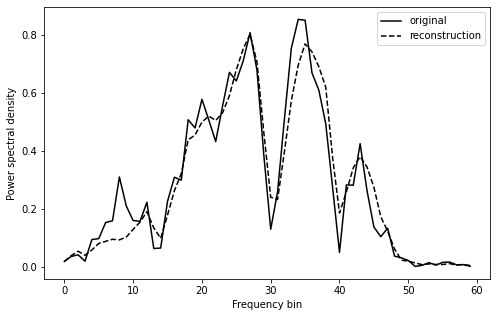

In [14]:
sample = 0

plt.figure(figsize=(8,5))
plt.plot(feature_tensor[sample].numpy(), label='original', color='black')
plt.plot(model(feature_tensor[sample]).detach().numpy(), label='reconstruction', color='black', linestyle='--')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density')
plt.legend()
plt.show()